In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier

In [2]:
pd.set_option("display.max_rows", 10)

In [3]:
df = pd.read_csv("anime_filtered.csv")
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,NaN,グッチョンパおもしろ話,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,5,Finished Airing,...,NaN,Fall 1987,Unknown,"{'Other': [{'mal_id': 26087, 'type': 'anime', ...",NaN,NaN,NaN,Kids,[],[]
14470,21525,Geba Geba Shou Time!,NaN,ゲバゲバ笑タイム!,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,1,Finished Airing,...,NaN,NaN,NaN,[],Studio Lotus,NaN,NaN,Comedy,[],[]
14471,37897,Godzilla: Hoshi wo Kuu Mono,NaN,GODZILLA -星を喰う者-,"Godzilla Part 3, Godzilla: Eater of Stars",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Other,1,Not yet aired,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 36816, 'type': 'anime'...",NaN,NaN,NaN,"Action, Sci-Fi, Adventure, Fantasy",[],[]
14472,34193,Nippon Mukashibanashi: Sannen Netarou,NaN,日本昔ばなし 三ねん寝太郎,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,"Fantasy, Kids",[],[]


### Gênero

Ao analisar o banco de dados, queremos esclarecer se o gênero de um anime pode ou não impactar na sua nota ou popularidade.

A nota é um número individual para cada anime. É a média da nota dada por todos os usuários do MyAnimeList que avaliaram o anime, e vai de 0 a 10.
A popularidade é um número único para cada anime, de 1 a 14474 (número total de animes registrados), que ranqueia os animes por maior número de espectadores registrados.

Vamos analisar a média de notas e a média de popularidade de animes e tentar traçar uma relação com o gênero.

Separando os dados de forma mais organizada para isso:

In [4]:
## Separando apenas os dados que serão usados
anime_df = df[["anime_id", "title", "score", "rank", "popularity", "genre"]]
anime_df

,anime_id,title,score,rank,popularity,genre
0,11013,Inu x Boku SS,7.63,1274.0,231,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,7.89,727.0,366,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,7.55,1508.0,1173,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,8.21,307.0,916,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,8.67,50.0,426,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,5.50,10337.0,13598,Kids
14470,21525,Geba Geba Shou Time!,4.60,10236.0,13284,Comedy
14471,37897,Godzilla: Hoshi wo Kuu Mono,0.00,NaN,7226,"Action, Sci-Fi, Adventure, Fantasy"
14472,34193,Nippon Mukashibanashi: Sannen Netarou,6.00,11557.0,14334,"Fantasy, Kids"


In [5]:
## Tratando dados categóricos de gênero
anime_df["genre"] = anime_df["genre"].str.replace(" ", "")
pd.set_option("display.max_columns", 100)
genres_df = anime_df["genre"].str.get_dummies(sep=',')
anime_df = anime_df.join(genres_df)

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
## Criando uma lista com todos os gêneros
list_of_genres = genres_df.apply(pd.Series.value_counts).iloc[1].sort_values(ascending = False)
list_of_genres

Comedy       5250
Action       3253
Fantasy      2701
Adventure    2582
Drama        2294
             ... 
Josei          81
ShounenAi      79
ShoujoAi       67
Yuri           41
Yaoi           39
Name: 1, Length: 43, dtype: int64

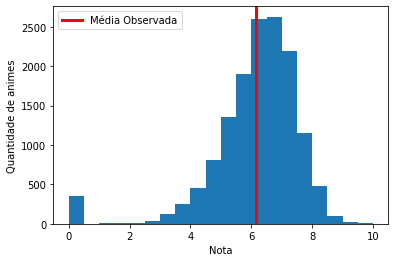

In [7]:
# Histograma das notas de todos os animes
plt.hist(anime_df["score"], bins = 20)
score_mean = anime_df["score"].mean()
mean_line = plt.axvline(x=score_mean, lw=3, color='red', label='Média Observada')
plt.legend()
plt.ylabel('Quantidade de animes')
plt.xlabel('Nota')

plt.show()

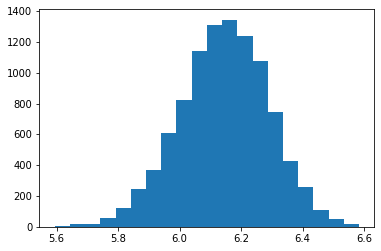

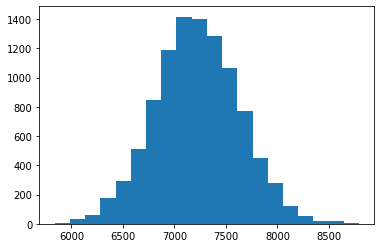

In [8]:
## Computando a estatística de teste (média de nota) para uma amostra da população
def compute_mean(df, column):
    return df[column].mean()

## Gerando uma amostra aleatória de 100 (ou outro número) animes da população, sem reposição
def compute_mean_random_sample(df, column, size=100):
    random_sample = df.sample(n=size, replace=False)
    return compute_mean(random_sample, column)

## Fazendo 10000 (ou outro número) de amostras aleatórias e computando a estatística
def compute_mean_model(df, column, sample_size=100, sample_count=10000):
    sample_means = np.array([])
    for i in range(sample_count):
        sample_means = np.append(sample_means, np.array([compute_mean_random_sample(df, column, size=sample_size)]))
    return sample_means

random_score_results = compute_mean_model(anime_df, "score")
plt.hist(random_score_results, bins = 20)
plt.show()
random_pop_results = compute_mean_model(anime_df, "popularity")
plt.hist(random_pop_results, bins = 20)
plt.show()

def compute_confidence_interval(array, conf=99):
    conf_dist = 100 - conf
    return np.array([np.percentile(array, conf_dist), np.percentile(array, conf)])

score_confidence_interval = compute_confidence_interval(random_score_results)
pop_confidence_interval = compute_confidence_interval(random_pop_results)

O gráfico acima é o histograma da média das notas de 10000 amostras aleatórias de 100 animes, tiradas da população original. Representa a hipótese nula, ou seja, um modelo em que a diferença de média de nota de animes é apenas devido à chance.

Para o teste, é pegada a média de animes com gêneros específicos, e comparada ao dado histograma, para verificar se a hipótese nula pode ou não ser confirmada:

In [9]:
## Plotando os testes de hipótese

def plot_hypothesis_test_genre(results, column, conf_interval):
    plt.figure(figsize=(20,10)) 
    plt.hist(results, bins = 20, alpha=0.6)
    for genre in list_of_genres.index.values:
        genre_mean = anime_df.loc[anime_df[genre] == 1][column].mean()
        plt.scatter(genre_mean, 0, color=np.random.rand(3,), label=genre)
    plt.legend(loc=2, prop={'size': 12}, ncol=3)
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

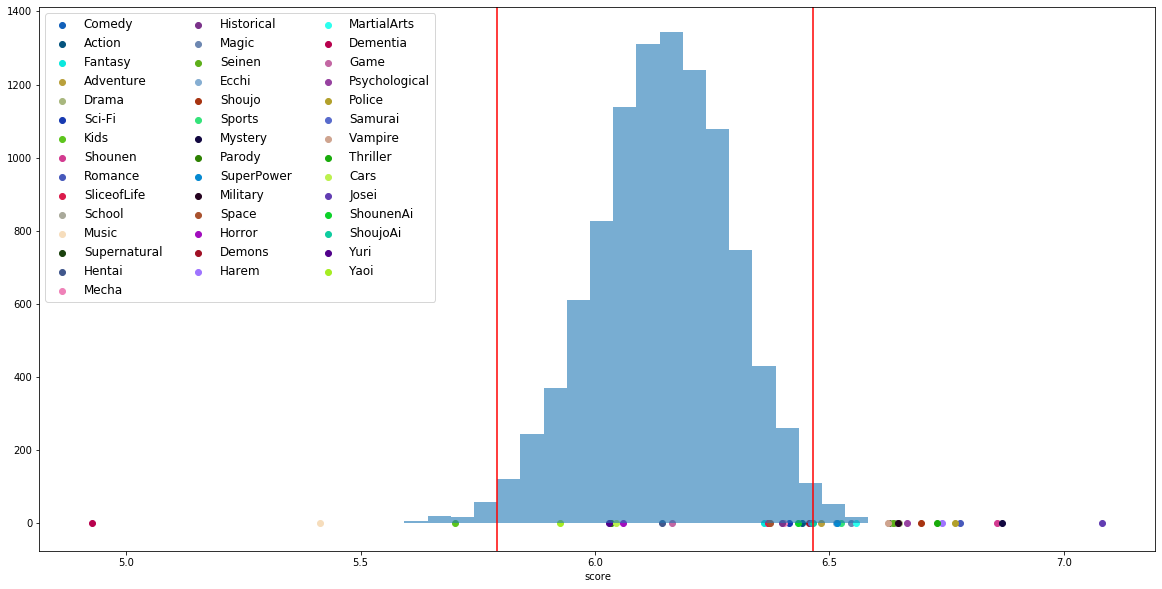

In [10]:
plot_hypothesis_test_genre(random_score_results, "score", score_confidence_interval)

As linhas verticais vermelhas são o intervalo de confiança de 99% do modelo aleatório.

Observando o gráfico acima, é claro que vários gêneros estão fora desse intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de nota de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o gênero impacta na nota de um anime. Animes de gêneros mais populares (como Shounen e Mistério, por exemplo) estão com médias de notas bem mais altas em relação ao modelo aleatório (6.86 e 6.87, respectivamente), enquanto animes de gêneros menos populares (como Dementia e Música) tem médias menores (4.93 e 5.41, respectivamente).



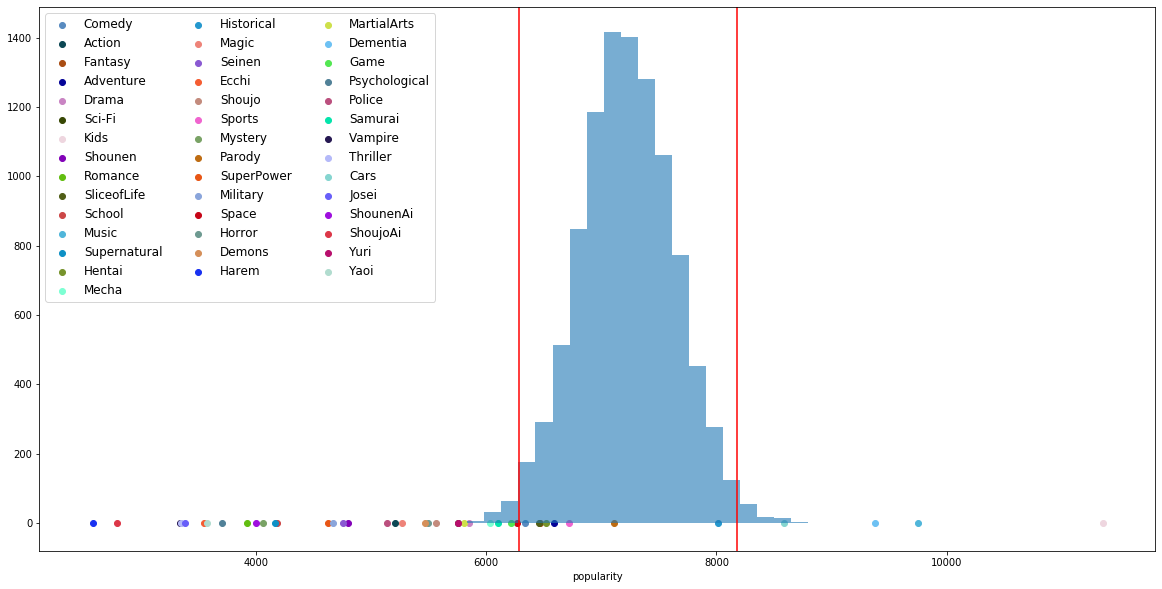

In [11]:
plot_hypothesis_test_genre(random_pop_results, "popularity", pop_confidence_interval)

Observando o segundo gráfico acima, é claro que vários gêneros também estão fora do intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de popularidade de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o gênero impacta na popularidade de um anime. Alguns gêneros estão bem mais populares do que a popularidade média (como Harem e ShoujoAi), e a maioria deles acima do intervalo de confiança.

### Número de episódios

Pode ser feita uma análise semelhante à feita com gênero mas com o número de episódios de um anime. Um anime ser maior em extensão (mais episódios) impacta na nota/popularidade dele?

Já temos os histogramas de nota e popularidade das amostras aleatórias, que podem ser reaproveitados. Vamos escolher uma média de nota e popularidade para animes com um número de episódios maior do que uma porcentagem de todos os animes (digamos maiores que 95% dos animes registrados).

In [12]:
anime_df = df[["anime_id", "title", "score", "popularity", "episodes"]].sort_values(by=['episodes'], ascending=False)

## Conseguindo a média de episódios de animes acima de uma porcentagem do restante
def get_episode_threshold_mean(df, threshold):
    threshold_episodes = int(np.percentile(df["episodes"], threshold))
    top_episode_anime = anime_df.loc[anime_df["episodes"] >= threshold_episodes]
    return top_episode_anime

## Por exemplo, dar a média de episódio dos 5% de animes com mais episódios no total
get_episode_threshold_mean(anime_df, 95)

,anime_id,title,score,popularity,episodes
11627,12393,Oyako Club,5.96,10337,1818
11216,2471,Doraemon (1979),7.73,2666,1787
3814,23349,Kirin Monoshiri Yakata,5.98,11264,1565
3815,6277,Manga Nippon Mukashibanashi (1976),6.37,9150,1471
7764,8213,Hoka Hoka Kazoku,5.93,10491,1428
...,...,...,...,...,...
3806,10528,Duel Masters Cross Shock,6.41,7846,50
11911,11017,Battle Spirits: Heroes,6.57,8043,50
10781,13179,Little Charo 2,5.95,11752,50
8825,150,Blood+,7.76,277,50


In [13]:
## Plotando os testes de hipótese para número de episódios
def plot_hypothesis_test_episodes(results, column, conf_interval):
    plt.figure(figsize=(10,5)) 
    plt.hist(results, bins = 20, alpha=0.6)
    
    top_episodes = get_episode_threshold_mean(anime_df, 95)
    top_ep_mean = top_episodes[column].mean()
    plt.scatter(top_ep_mean, 0, color='orange', label="top 5%")
    plt.legend(loc=2, prop={'size': 12}, ncol=3)
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

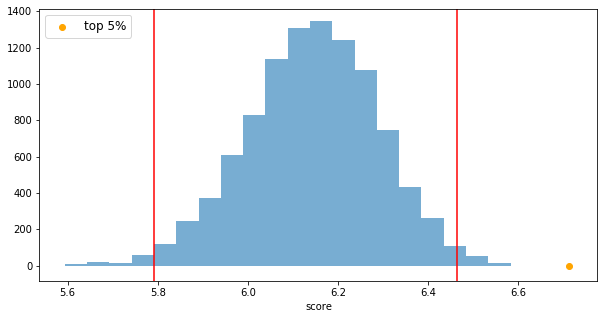

In [14]:
plot_hypothesis_test_episodes(random_score_results, "score", score_confidence_interval)

Observando o gráfico acima, é evidente que os animes com mais episódios estão fora desse intervalo de confiança, logo pode-se rejeitar com algum grau de certeza a hipótese nula de que a variação de nota de animes seria apenas por chance.

Além disso, pode-se dizer que as estatísticas favorecem a hipótese alternativa de que o número de episódios impacta na nota de um anime, já que os 5% de animes com mais episódios estão longe do intervalo de confiança determinado para notas.

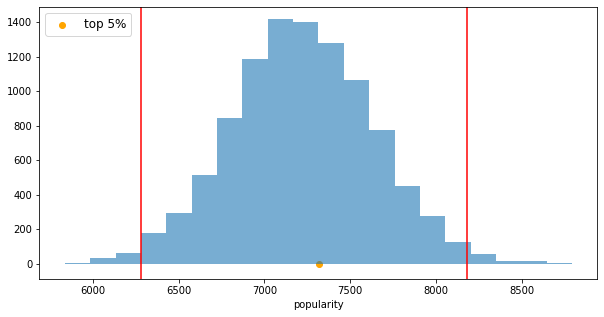

In [15]:
plot_hypothesis_test_episodes(random_pop_results, "popularity", pop_confidence_interval)

Entretanto, o gráfico de popularidade mostra uma diferença. A observação condiz quase que perfeitamente com a média das amostras aleatórias. 

Com isso, pode-se concluir que, nesse caso, a hipótese nula de que o número de episódios não impacta na popularidade de um anime (e variações são apenas devido ao acaso) é válida.

### Temporada de lançamento

Pode ser feita uma análise semelhante às feitas anteriormente com a temporada (ou estação) de lançamento de um anime. Dada uma estação, o anime é impactado em nota/popularidade por sua temporada de lançamento?

Nessa análise, devemos tomar um cuidado: alguns animes não tem dados de temporada de lançamento. Nesse caso, as amostras aleatórias de média de nota e popularidade serão refeitas, mas considerando apenas animes que tem temporada de lançamento no banco de dados.

In [16]:
## Separando os animes por estação/temporada de lançamento
anime_df = df[["anime_id", "title", "score", "popularity", "premiered"]]

anime_df["premiered"] = df["premiered"].str.split().str[0]

## Deixando apenas aqueles que possuem dados de temporada
anime_df = anime_df.dropna(axis=0)
anime_df

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,anime_id,title,score,popularity,premiered
0,11013,Inu x Boku SS,7.63,231,Winter
1,2104,Seto no Hanayome,7.89,366,Spring
2,5262,Shugo Chara!! Doki,7.55,1173,Fall
3,721,Princess Tutu,8.21,916,Summer
4,12365,Bakuman. 3rd Season,8.67,426,Fall
...,...,...,...,...,...
14395,37778,Pastel Life,6.62,7722,Spring
14410,37662,Shinya! Tensai Bakabon,0.00,12783,Summer
14438,37428,Chara to Otamajakushi Shima,0.00,14456,Spring
14459,37787,Space Bug,0.00,14280,Summer


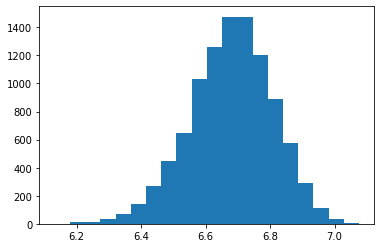

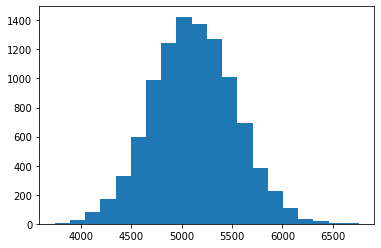

In [17]:
## Refazendo os resultados da amostragem para apenas animes com dados de temporada no banco

random_score_results = compute_mean_model(anime_df, "score")
plt.hist(random_score_results, bins = 20)
plt.show()
random_pop_results = compute_mean_model(anime_df, "popularity")
plt.hist(random_pop_results, bins = 20)
plt.show()

score_confidence_interval = compute_confidence_interval(random_score_results)
pop_confidence_interval = compute_confidence_interval(random_pop_results)

In [18]:
## Lista de temporadas
list_of_seasons = ["Spring", "Summer", "Fall", "Winter"]

In [19]:
## Plotando os testes de hipótese

def plot_hypothesis_test_season(results, column, conf_interval):
    plt.figure(figsize=(10,5)) 
    plt.hist(results, bins = 20, alpha=0.6)
    for season in list_of_seasons:
        season_mean = anime_df.loc[anime_df["premiered"] == season][column].mean()
        plt.scatter(season_mean, 0, color=np.random.rand(3,), label=season)
    plt.legend(loc=2, prop={'size': 12})
    plt.xlabel(column)
    plt.axvline(x=conf_interval[0], lw=1.5, color='red')
    plt.axvline(x=conf_interval[1], lw=1.5, color='red')
    plt.show()

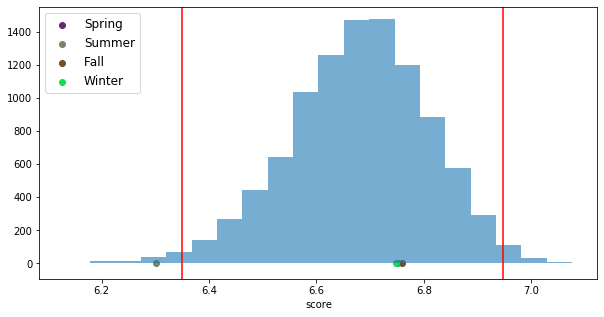

In [20]:
plot_hypothesis_test_season(random_score_results, "score", score_confidence_interval)

Pelos resultados acima, a hipótese nula de que a temporada não impacta na nota do anime (e que variações são apenas devido ao acaso) pode ser descartada, já que a média de nota de animes lançados no verão está fora do intervalo de confiança estipulado.

Essa evidência favorece a hipótese alternativa de que animes lançados no verão são mais bem avaliados que outros (possivelmente por ser uma boa temporada para lançar, coincidindo com o período de férias escolares)

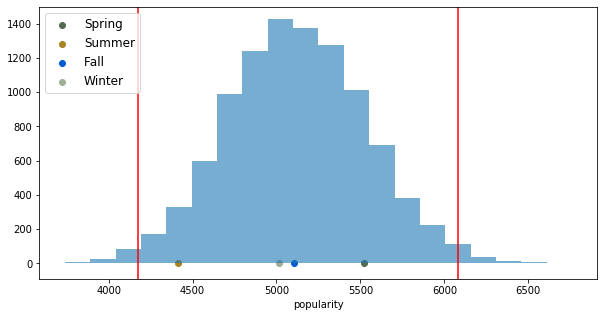

In [21]:
plot_hypothesis_test_season(random_pop_results, "popularity", pop_confidence_interval)

O mesmo não pode ser dito para a popularidade de animes, e os testes confirmam a hipótese nula de que a temporada de lançamento não afeta a popularidade do anime (e que variações são devidas ao acaso).

## KNN

Queremos descobrir se é possível determinar os gêneros de um anime a partir de seus atributos, mais especificamente, usando o número de episódios, popularidade e nota de avaliação dos usuários. Para tal, vamos classifica-los usando os K Nearest Neighbours.

Cada anime observado pode pertencer a mais de um gênero, e portanto precisamos de classificador que suporte múltiplas labels. Adotaremos então a estratégia do OneVsRest.

In [22]:
#leitura dos dados iniciais. Filtramos o dataset para conter apenas observações que tenham mais de um episódio,
#para desconsiderar filmes

df = pd.read_csv("anime_cleaned.csv")
df = df[['anime_id', 'title', 'episodes', 'popularity', 'score', 'genre']]
df = df.loc[df['episodes'] > 1] #seleciona apenas animes com mais de 1 episodio

animes = df.copy()
animes

,anime_id,title,episodes,popularity,score,genre
0,11013,Inu x Boku SS,12,231,7.63,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,26,366,7.89,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,51,1173,7.55,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,38,916,8.21,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,25,426,8.67,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...
6654,37895,Ling Yu 5th Season,12,13848,7.50,Fantasy
6655,37888,Tian Yu,13,14211,6.00,"Action, Adventure, Demons, Fantasy, Magic"
6656,37667,Heisei Matsue Kaidan,7,14003,4.69,"Horror, Parody, Supernatural"
6658,36913,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,4,9441,5.87,Comedy


Abaixo fazemos a normalização das variáveis independentes e aplicamos one hot encoding para os gêneros, assim, cada coluna de y representará um gênero.

Em seguida, separamos os dados em dados de treino e teste

In [23]:
#aplicando KNN
    
X = animes[['episodes', 'popularity', 'score']]
y = animes[['genre']]

X = StandardScaler().fit_transform(X) #normaliza os dados

#transforma cada genero de anime em uma coluna
y["genre"] = y["genre"].str.replace(" ", "")
y = y["genre"].str.get_dummies(sep=',')

#separação de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Abaixo otimizamos o valor de k, variando este de 3 até 103. 

No início da otimização separamos os dataset de treino novamente, gerando agora um novo conjunto para treino e um para validação.

In [24]:
def otimiza_k(X, y):        
    #Separação de treino e validação
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

    k_max_accuracy = 0
    train_max_accuracy = 0
    valid_max_accuracy = 0
    
    for k in (1, 3, 5, 7, 9, 11, 15, 17, 19, 21, 25, 29, 33, 37, 41, 45, 49, 53, 63, 73, 83, 93, 103):
        knn = KNeighborsClassifier(n_neighbors=k)
        clf = OneVsRestClassifier(knn).fit(X_train, y_train) # treina no conjunto de treino
        y_pred = clf.predict(X_train) #previsões no conjunto de treino
        y_pred_v = clf.predict(X_valid)#previsoes no conjunto de validacao 
        
        # Resultado com melhor acurácia
        t_accuracy = accuracy_score(y_pred, y_train)
        v_accuracy = accuracy_score(y_pred_v, y_valid)
        
        #atualiza melhor k se este obtem melhor acuracia tanto em treino quanto validacao
        #nos casos em que k melhora a acuracia em treino mas nao em validacao, temos overfitting,
        #e portanto nao atualizamos k
        if (t_accuracy > train_max_accuracy and v_accuracy > valid_max_accuracy):
                k_max_accuracy = k
                train_max_accuracy = t_accuracy
                valid_max_accuracy = v_accuracy
        
        
        return k_max_accuracy

otimiza_k(X_train, y_train)

3

Por fim, classificamos quanto aos k vizinhos mais próximos e obtemos o resultado médio do teste de acurácia.

In [25]:
k = otimiza_k(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=k)
clf = OneVsRestClassifier(knn).fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_test, y_test)

0.03518518518518519

A nota obtida deixou a desejar, perto 3.8%, mas isto é parcialmente esperado, pois como temos N colunas de gêneros, um acerto só é contabilizado se para uma dada observação todas as N colunas forem classificadas corretamente

Vamos olhar as métricas obtidas mais de perto

In [26]:
#o index de um anime no array é o mesmo presente na tabela, e.g. 'action' é representado na primeira linha da tabela
print(y.columns)
print(classification_report(y_test, y_pred))

Index(['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama',
       'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror',
       'Josei', 'Kids', 'Magic', 'MartialArts', 'Mecha', 'Military', 'Music',
       'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
       'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen',
       'ShounenAi', 'SliceofLife', 'Space', 'Sports', 'SuperPower',
       'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')
              precision    recall  f1-score   support

           0       0.35      0.28      0.31       321
           1       0.31      0.19      0.24       216
           2       0.00      0.00      0.00         7
           3       0.50      0.49      0.49       517
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        30
           6       0.31      0.20      0.24       225
           7       0.40      0.1

/home/adam/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/adam/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


Vemos que a média de precisão e recall para um dado gênero é perto de 25%, um pouco melhor do que o resultado obtido previamente. 

Como esperado, os gêneros mais presentes no dataset obtiveram os melhores resultados, enquanto aqueles com menores observações tiveram valores equivalentes ou próximos de 0.

É possível que com um volume de dados maior encontraríamos melhores resultados, mas dadas as circunstâncias, não parece que os métodos aplicados são suficientes para classificar os animes quanto ao gênero.